# Covid Tests Simulation 

In [5]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [4]:
def average_n_tests(p, n=5000, seed=123):
    '''
    This function uses simulation to calculate the number of
    COVID tests required per individual when using a pooled-
    testing procedure, pooling 5 tests at once.
    
    It accepts three arguments:
      - p: the proportion of the population that is COVID
           positive
      - n: the number of simulations to use
      - seed: the seed to use for the simulation
    
    It returns the average number of tests required over all
    simulations.
    '''
    
    # Seed the random number generator
    np.random.seed(seed)
    
    # Create a list to store the number of tests per person
    # required in each of our simulations
    n_tests = []

    for i in range(n):
        # Simulate the five people we're pooling; each will be drawn from a Bernoulli random variable 
        # with probability equal to the proportion of the population that is COVID positive
        s = np.random.binomial(n=1, p=p, size=5)
        
        if max(s) == 1:
            # If max(s) = 1, then at least once person is positive; the outcome of the test will be 
            # a Bernoulli RV with p=0.9 (sensitivity of the test)
            T = np.random.binomial(n=1, p=0.9)
        else:
            # If max(s) = 0, then everyone in the pool is negative; Bernoulli RV with p=0.02 (specificity)
            T = np.random.binomial(n=1, p=0.02)
        
        if T == 0:
            # If the test was negative, it only takes one test to test someone
            n_tests.append(0.2)
        else:
            # If the test was positive, we need to test every person again, so it takes 1.2 tests per person
            n_tests.append(1.2)
    
    return [np.mean(n_tests), np.std(n_tests)]

In [6]:
# Running 5,000 simulations and returning the 95% confidence interval 
n = 5000
mu, sigma = average_n_tests(0.2, n=n)
print(f'95% CI: {round(mu - 1.96*sigma/np.sqrt(n),4)}-{round(mu + 1.96*sigma/np.sqrt(n),4)}')

95% CI: 0.7864-0.8136


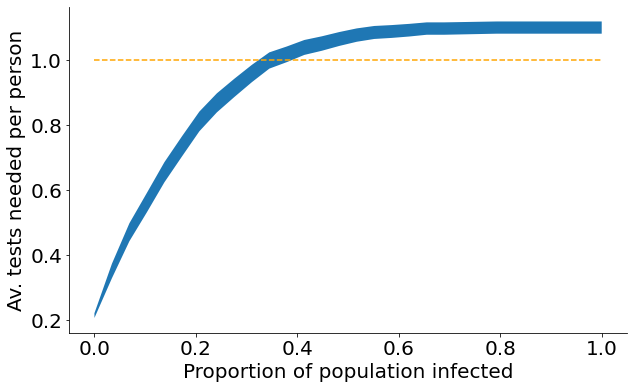

In [7]:
# Calculating the avg number of tests needed per person depending on the proportion of population infected 
n = 1000

prop_infected = np.linspace(0, 1, num=30)
sim_results = [average_n_tests(p, n=n) for p in prop_infected]

avg_n_tests = [i[0] for i in sim_results]
std_n_tests = [i[1] for i in sim_results]

lower_ci = [i - 1.96*j/np.sqrt(n) for i, j in zip(avg_n_tests, std_n_tests)]
upper_ci = [i + 1.96*j/np.sqrt(n) for i, j in zip(avg_n_tests, std_n_tests)]

plt.figure(figsize=(10, 6))
plt.fill_between(prop_infected, lower_ci, upper_ci)
plt.plot([0, 1], [1, 1], linestyle='--', color='orange')
plt.xlabel('Proportion of population infected', fontsize=20)
plt.ylabel('Av. tests needed per person', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
sns.despine()